<a href="https://colab.research.google.com/github/11SF/datasci-cs245-final-project/blob/main/245_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import matplotlib as mpl 
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

link dataset ที่ใช้ : https://www.kaggle.com/ruchi798/movies-on-netflix-prime-video-hulu-and-disney

import dataset จาก google drive


In [8]:
dataframe = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/CSV_file/MoviesOnStreamingPlatforms_updated.csv')
dataframe

,Unnamed: 0,ID,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Type,Directors,Genres,Country,Language,Runtime
0,0,1,Inception,2010,13+,8.8,87%,1,0,0,0,0,Christopher Nolan,"Action,Adventure,Sci-Fi,Thriller","United States,United Kingdom","English,Japanese,French",148.0
1,1,2,The Matrix,1999,18+,8.7,87%,1,0,0,0,0,"Lana Wachowski,Lilly Wachowski","Action,Sci-Fi",United States,English,136.0
2,2,3,Avengers: Infinity War,2018,13+,8.5,84%,1,0,0,0,0,"Anthony Russo,Joe Russo","Action,Adventure,Sci-Fi",United States,English,149.0
3,3,4,Back to the Future,1985,7+,8.5,96%,1,0,0,0,0,Robert Zemeckis,"Adventure,Comedy,Sci-Fi",United States,English,116.0
4,4,5,"The Good, the Bad and the Ugly",1966,18+,8.8,97%,1,0,1,0,0,Sergio Leone,Western,"Italy,Spain,West Germany",Italian,161.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16739,16739,16740,The Ghosts of Buxley Hall,1980,NaN,6.2,NaN,0,0,0,1,0,Bruce Bilson,"Comedy,Family,Fantasy,Horror",United States,English,120.0
16740,16740,16741,The Poof Point,2001,7+,4.7,NaN,0,0,0,1,0,Neal Israel,"Comedy,Family,Sci-Fi",United States,English,90.0
16741,16741,16742,Sharks of Lost Island,2013,NaN,5.7,NaN,0,0,0,1,0,Neil Gelinas,Documentary,United States,English,NaN
16742,16742,16743,Man Among Cheetahs,2017,NaN,6.6,NaN,0,0,0,1,0,Richard Slater-Jones,Documentary,United States,English,NaN


แสดงชนิดข้อมูล และจำนวนข้อมูลที่ไม่เป็นค่า null ในแต่ละ column และตรวจสอบว่า ชนิดของข้อมูลเป็นไปตามที่เราต้องการหรือไม่ โดยการใช้ .info()

In [4]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16744 entries, 0 to 16743
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       16744 non-null  int64  
 1   ID               16744 non-null  int64  
 2   Title            16744 non-null  object 
 3   Year             16744 non-null  int64  
 4   Age              7354 non-null   object 
 5   IMDb             16173 non-null  float64
 6   Rotten Tomatoes  5158 non-null   object 
 7   Netflix          16744 non-null  int64  
 8   Hulu             16744 non-null  int64  
 9   Prime Video      16744 non-null  int64  
 10  Disney+          16744 non-null  int64  
 11  Type             16744 non-null  int64  
 12  Directors        16018 non-null  object 
 13  Genres           16469 non-null  object 
 14  Country          16309 non-null  object 
 15  Language         16145 non-null  object 
 16  Runtime          16152 non-null  float64
dtypes: float64(2

ตรวจสอบจำนวนข้อมูลที่ missing ในแต่ละ column ว่ามี row ที่ข้อมูล missing ไปรวมทั้งหมดเท่าไหรในแต่ละ column โดยใช้ .isna() และสั่งให้นับจำนวนโดยใช้ .sum()

In [5]:
dataframe.isna().sum()

Unnamed: 0             0
ID                     0
Title                  0
Year                   0
Age                 9390
IMDb                 571
Rotten Tomatoes    11586
Netflix                0
Hulu                   0
Prime Video            0
Disney+                0
Type                   0
Directors            726
Genres               275
Country              435
Language             599
Runtime              592
dtype: int64

Columns : Age และ Rotten Tomatoes มีข้อมูลที่เป็นค่า null เยอะมาก

เลือก Drop คอลัมน์ Unnamed: 0 และ ID ทิ้ง เพราะ สามารถใช้ค่า Index ของ Dataframe  ได้
และ Drop คอลัมน์ Type เพราะ มีค่า 0 ค่าเดียว 

In [9]:
dataframe['Type'].unique()

array([0])

In [10]:
dataframe = dataframe.drop(['Unnamed: 0'], axis=1)
dataframe = dataframe.drop(['ID'], axis=1)
dataframe = dataframe.drop(['Type'], axis=1)
dataframe

,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Directors,Genres,Country,Language,Runtime
0,Inception,2010,13+,8.8,87%,1,0,0,0,Christopher Nolan,"Action,Adventure,Sci-Fi,Thriller","United States,United Kingdom","English,Japanese,French",148.0
1,The Matrix,1999,18+,8.7,87%,1,0,0,0,"Lana Wachowski,Lilly Wachowski","Action,Sci-Fi",United States,English,136.0
2,Avengers: Infinity War,2018,13+,8.5,84%,1,0,0,0,"Anthony Russo,Joe Russo","Action,Adventure,Sci-Fi",United States,English,149.0
3,Back to the Future,1985,7+,8.5,96%,1,0,0,0,Robert Zemeckis,"Adventure,Comedy,Sci-Fi",United States,English,116.0
4,"The Good, the Bad and the Ugly",1966,18+,8.8,97%,1,0,1,0,Sergio Leone,Western,"Italy,Spain,West Germany",Italian,161.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16739,The Ghosts of Buxley Hall,1980,NaN,6.2,NaN,0,0,0,1,Bruce Bilson,"Comedy,Family,Fantasy,Horror",United States,English,120.0
16740,The Poof Point,2001,7+,4.7,NaN,0,0,0,1,Neal Israel,"Comedy,Family,Sci-Fi",United States,English,90.0
16741,Sharks of Lost Island,2013,NaN,5.7,NaN,0,0,0,1,Neil Gelinas,Documentary,United States,English,NaN
16742,Man Among Cheetahs,2017,NaN,6.6,NaN,0,0,0,1,Richard Slater-Jones,Documentary,United States,English,NaN


ใน คอลัมน์ Rotten Tomatoes
ลบ String ที่ไม่ใช่ตัวเลขออก เพราะ จะแปลง object เป็น integer
และแทนที่ค่า NaN ด้วย 0 ทั้งหมด

In [11]:
dataframe['Rotten Tomatoes'] = dataframe['Rotten Tomatoes'].str.strip('%')
dataframe

dataframe_2 = dataframe

dataframe_2['Rotten Tomatoes'] = dataframe_2['Rotten Tomatoes'].fillna(0)
# dataframe_2['Runtime'] = dataframe_2['Runtime'].fillna(0)

dataframe_2

,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Directors,Genres,Country,Language,Runtime
0,Inception,2010,13+,8.8,87,1,0,0,0,Christopher Nolan,"Action,Adventure,Sci-Fi,Thriller","United States,United Kingdom","English,Japanese,French",148.0
1,The Matrix,1999,18+,8.7,87,1,0,0,0,"Lana Wachowski,Lilly Wachowski","Action,Sci-Fi",United States,English,136.0
2,Avengers: Infinity War,2018,13+,8.5,84,1,0,0,0,"Anthony Russo,Joe Russo","Action,Adventure,Sci-Fi",United States,English,149.0
3,Back to the Future,1985,7+,8.5,96,1,0,0,0,Robert Zemeckis,"Adventure,Comedy,Sci-Fi",United States,English,116.0
4,"The Good, the Bad and the Ugly",1966,18+,8.8,97,1,0,1,0,Sergio Leone,Western,"Italy,Spain,West Germany",Italian,161.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16739,The Ghosts of Buxley Hall,1980,NaN,6.2,0,0,0,0,1,Bruce Bilson,"Comedy,Family,Fantasy,Horror",United States,English,120.0
16740,The Poof Point,2001,7+,4.7,0,0,0,0,1,Neal Israel,"Comedy,Family,Sci-Fi",United States,English,90.0
16741,Sharks of Lost Island,2013,NaN,5.7,0,0,0,0,1,Neil Gelinas,Documentary,United States,English,NaN
16742,Man Among Cheetahs,2017,NaN,6.6,0,0,0,0,1,Richard Slater-Jones,Documentary,United States,English,NaN


เช็คว่า dataframe นี้มีข้อมูลหนังที่ซ้ำกันหรือไม่ เช็คจากข้อมูลในส่วนของ title และ year ของแต่ละ row
หากมีซ้ำกันจะได้นำอันใดอันนึงออก แต่ในกรณีนี้ ไม่มีข้อมูลที่ซ้ำกัน

In [12]:
print(dataframe_2.duplicated(['Title', 'Year']).sum())

0


แยกหนังที่มีในแต่ละ platform 

In [13]:
netflix_movies = dataframe_2.loc[dataframe_2['Netflix'] == 1]
hulu_movies = dataframe_2.loc[dataframe_2['Hulu'] == 1]
primeVideo_movies = dataframe_2.loc[dataframe_2['Prime Video'] == 1]
disneyPlus_movies = dataframe_2.loc[dataframe_2['Disney+'] == 1]

In [14]:
index_netflix = netflix_movies.index
total_netflix_movies = len(index_netflix)

index_hulu = hulu_movies.index
total_hulu_movies = len(index_hulu)

index_prime = primeVideo_movies.index
total_prime_movies = len(index_prime)

index_disney = disneyPlus_movies.index
total_disney_movies = len(index_disney)

นำมาแสดงเป็น pie chart ในส่วนของสัดส่วนของจำนวนหนังที่มีในแต่ละ platform

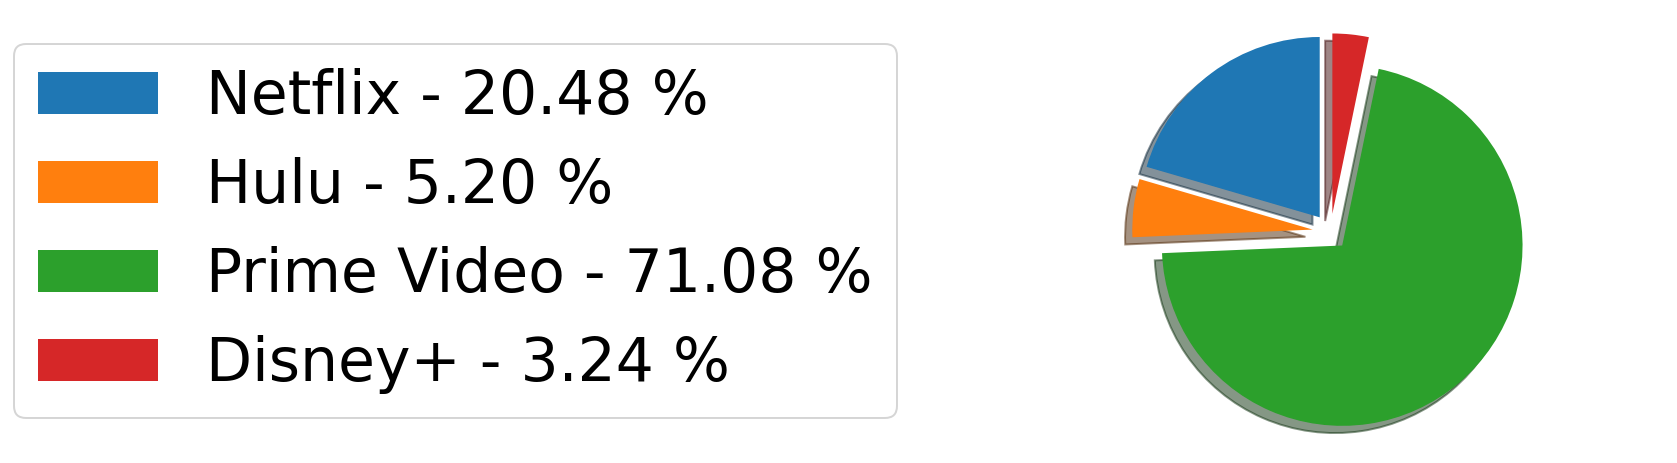

In [15]:
labels = 'Netflix' , 'Hulu', 'Prime Video', 'Disney+'
total_movies = [total_netflix_movies,total_hulu_movies,total_prime_movies,total_disney_movies]
explode = (0.1, 0.1, 0.1, 0.1 )
data_array = np.array(total_movies)
percent = 100.* (data_array/data_array.sum())

mylabels = ['{0} - {1:1.2f} %'.format(i,j) for i,j in zip(labels, percent)]
fig1 , ax1 = plt.subplots()

ax1.pie(total_movies, explode = explode, shadow = True, startangle = 90)

ax1.legend(mylabels, bbox_to_anchor=(-0.1, 1.), fontsize=30)

# _ = ax.axis ('equal')
ax1.axis ('equal')
plt.show()

จาก dataset ที่ได้มา ใน column ประเภทของหนัง หนังแต่ละเรื่องอาจจะมีประเภทของหนังหลายอย่าง ซึ่งใน dataset มีการใส่ , แยกเอาไว้ 
จึงนำ column "Genres" มา split แยกประเภทของหนัง และ fill ค่า 0 

In [16]:
list_of_genres = dataframe_2['Genres'].str.split(',',expand = True)
list_of_genres = list_of_genres.fillna(0)
list_of_genres

,0,1,2,3,4,5,6,7,8
0,Action,Adventure,Sci-Fi,Thriller,0,0,0,0,0
1,Action,Sci-Fi,0,0,0,0,0,0,0
2,Action,Adventure,Sci-Fi,0,0,0,0,0,0
3,Adventure,Comedy,Sci-Fi,0,0,0,0,0,0
4,Western,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...
16739,Comedy,Family,Fantasy,Horror,0,0,0,0,0
16740,Comedy,Family,Sci-Fi,0,0,0,0,0,0
16741,Documentary,0,0,0,0,0,0,0,0
16742,Documentary,0,0,0,0,0,0,0,0


หา Genres ของหนังทั้งหมดที่เป็นไปได้ใน dataframe นี้ โดยใช้ loop วนหาประเภทของหนังในแต่ละ row หากยังไม่มีก็ให้เพิ่มเข้ามาใน array หากมีแล้วก็ให้ข้ามไป จนหมดทั้ง dataframe

In [17]:
genres = []
for i in range(0,9):
    list_of_genres[i]
    for j in range(0, 16744) :
        if (list_of_genres[i][j] not in genres) and list_of_genres[i][j] != 'None' and list_of_genres[i][j] != 'nan' :
            genres.append(list_of_genres[i][j])
        else:
            pass  
genres

['Action',
 'Adventure',
 'Western',
 'Animation',
 'Biography',
 'Drama',
 'Crime',
 'Comedy',
 'Documentary',
 'Family',
 'Horror',
 'Thriller',
 'Mystery',
 0,
 'Fantasy',
 'Romance',
 'Short',
 'Sci-Fi',
 'Talk-Show',
 'Sport',
 'Reality-TV',
 'Musical',
 'Music',
 'War',
 'News',
 'History',
 'Game-Show',
 'Film-Noir']

จาก dataset ที่ได้มา ใน column ประเภทของหนัง หนังแต่ละเรื่องอาจจะมีประเภทของหนังหลายอย่าง ซึ่งใน dataset มีการใส่ , แยกเอาไว้ จึงนำ column "Genres" มา split แยกประเภทของหนัง และ fill ค่า 0

In [20]:
dataframe_2['Genres'].head()

0    Action,Adventure,Sci-Fi,Thriller
1                       Action,Sci-Fi
2             Action,Adventure,Sci-Fi
3             Adventure,Comedy,Sci-Fi
4                             Western
Name: Genres, dtype: object

In [21]:
list_of_genres_netflix = netflix_movies['Genres'].str.split(',',expand = True)
arr_list_of_genres_netflix = np.array(list_of_genres_netflix)
arr_list_of_genres_netflix

list_of_genres_hulu = hulu_movies['Genres'].str.split(',',expand = True)
arr_list_of_genres_hulu = np.array(list_of_genres_hulu)
arr_list_of_genres_hulu

list_of_genres_prime = primeVideo_movies['Genres'].str.split(',',expand = True)
arr_list_of_genres_prime = np.array(list_of_genres_prime)
arr_list_of_genres_prime

list_of_genres_disny = disneyPlus_movies['Genres'].str.split(',',expand = True)
arr_list_of_genres_disny = np.array(list_of_genres_disny)
arr_list_of_genres_disny

array([['Biography', 'Comedy', 'Drama', ..., None, None, None],
       ['Drama', None, None, ..., None, None, None],
       ['Animation', 'Adventure', 'Comedy', ..., None, None, None],
       ...,
       ['Documentary', None, None, ..., None, None, None],
       ['Documentary', None, None, ..., None, None, None],
       ['Documentary', 'Short', 'Family', ..., None, None, None]],
      dtype=object)

นำ Genres ทั้งหมดมาสร้างเป็น dataframe แยกประเภทแต่ละ column และใส่ค่า 0 เป็นค่าเริ่มต้น เพื่อที่จะนำมานับ genres ของหนัง

นับประเภทของหนัง และใส่ใน dataframe netflix_genres,hulu_genres,prime_genres,disney_genres



** หนังแต่ละเรื่องมี genres หลายค่า ซึ่งหากนับรวมทั่งหมด ค่ากราฟหลังจากการพล็อตแล้วจะมีค่าที่สูงเกินจริง เราจึงเลือกที่จะนับแค่ genres อันแรกที่ dataset เขียนมา เพื่อที่จะให้ได้หนัง 1 เรื่องมี genres ค่าเดียว ซึ่งในเวลาพล็อตกราฟแล้วจะมีค่าที่ใกล้เคียงความจริงมากกว่า

นำ netflix_genres มาทำ Bar chart แสดงประเภทของหนังที่มีในแต่ละ platform

In [28]:
netflix_genres = pd.DataFrame(columns=['sum'],index=genres)
netflix_genres = netflix_genres.fillna(0)


for i in arr_list_of_genres_netflix:
  for j in i:
    for a in range(netflix_genres.size):
      if(j == netflix_genres.iloc[a].name):
        netflix_genres.iloc[a]['sum'] += 1


netflix_genres = netflix_genres.drop([0], axis=0)

In [29]:
hulu_genres = pd.DataFrame(columns=['sum'],index=genres)
hulu_genres = hulu_genres.fillna(0)


for i in arr_list_of_genres_hulu:
  for j in i:
    for a in range(hulu_genres.size):
      if(j == hulu_genres.iloc[a].name):
        hulu_genres.iloc[a]['sum'] += 1


hulu_genres = hulu_genres.drop([0], axis=0)

In [30]:
prime_genres = pd.DataFrame(columns=['sum'],index=genres)
prime_genres = prime_genres.fillna(0)


for i in arr_list_of_genres_prime:
  for j in i:
    for a in range(prime_genres.size):
      if(j == prime_genres.iloc[a].name):
        prime_genres.iloc[a]['sum'] += 1


prime_genres = prime_genres.drop([0], axis=0)

In [31]:
disney_genres = pd.DataFrame(columns=['sum'],index=genres)
disney_genres = disney_genres.fillna(0)


for i in arr_list_of_genres_disny:
  for j in i:
    for a in range(disney_genres.size):
      if(j == disney_genres.iloc[a].name):
        disney_genres.iloc[a]['sum'] += 1


disney_genres = disney_genres.drop([0], axis=0)

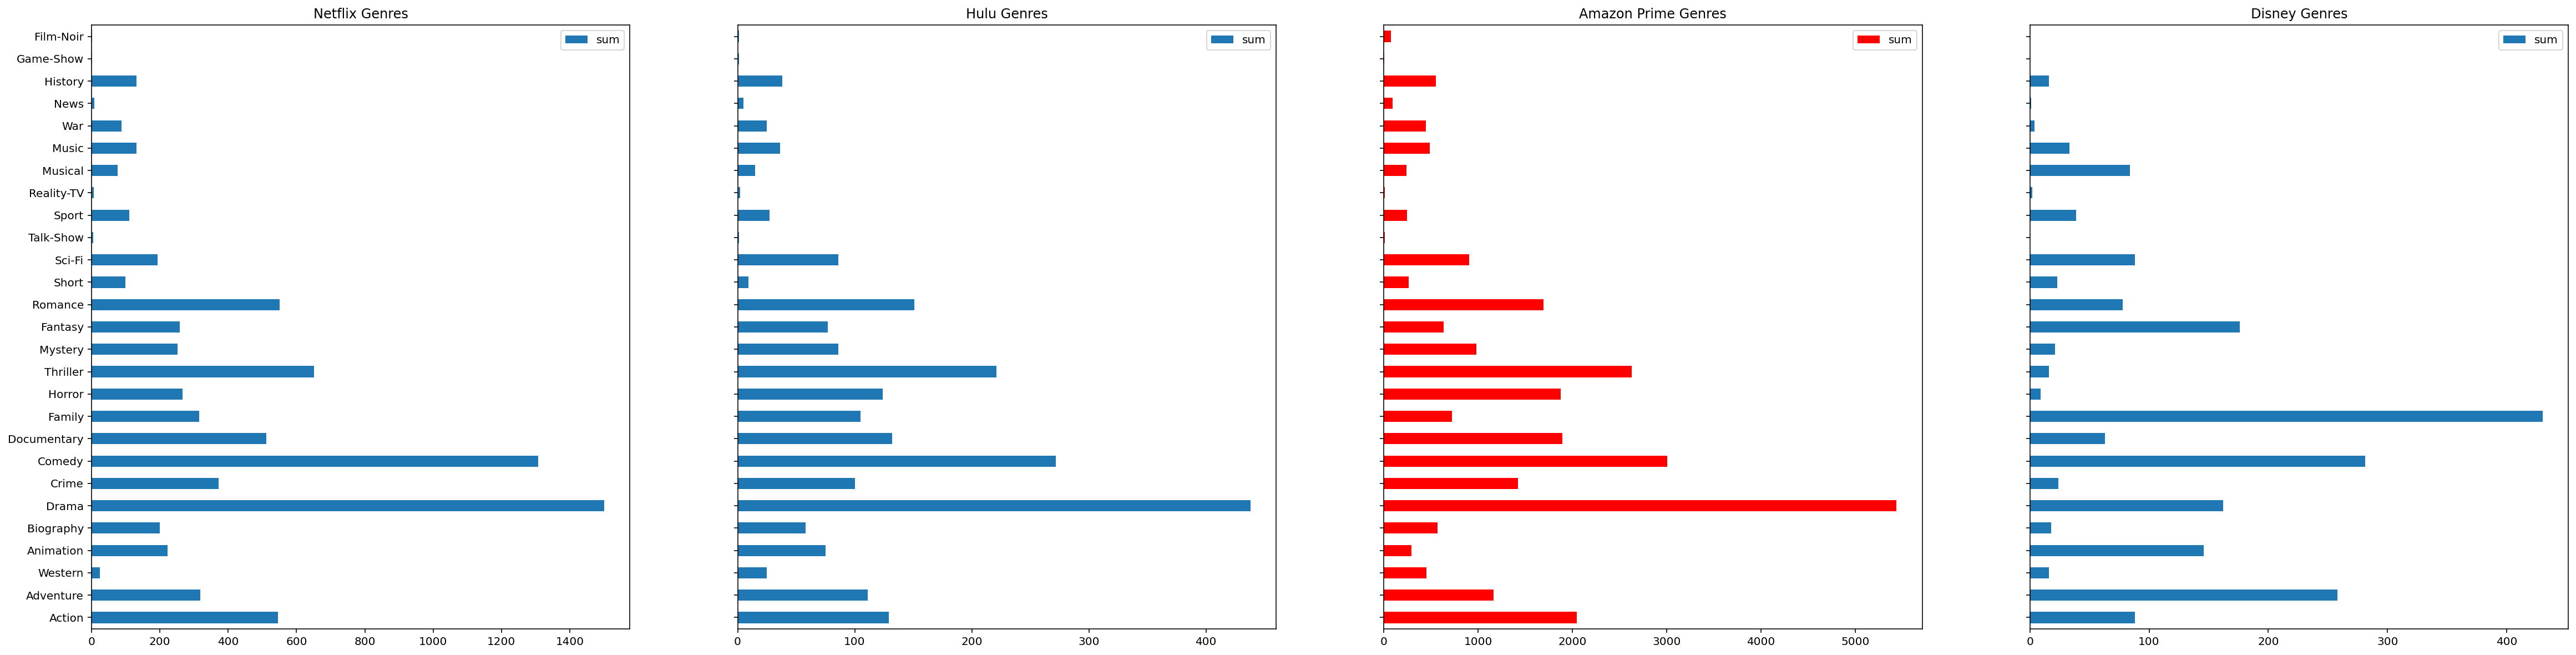

In [35]:
fig, ax = plt.subplots(1,4, sharey=True,sharex=False)
fig.set_figheight(10)
fig.set_figwidth(40)

ax[0].set_title('Netflix Genres')
netflix_genres.plot(kind="barh",ax=ax[0])

ax[1].set_title('Hulu Genres')
hulu_genres.plot(kind="barh",ax=ax[1])

ax[2].set_title('Amazon Prime Genres')
prime_genres.plot(kind="barh",ax=ax[2],color="red")

ax[3].set_title('Disney Genres')
disney_genres.plot(kind="barh",ax=ax[3])

แสดงค่าเฉลี่ยของคะแนนหนังจากเว็ปไซต์รีวิวหนัง IMDb ที่มีในแต่ละ Platform โดยการใช้ seaborn ในการ plot และแสดงผลโดยการจัดเป็นกลุ่ม เรียงเป็นแถวแนวนอน โดยให้มีการแชร์แกน Y โดยการใช้ subplots ในการทำ

(4,)


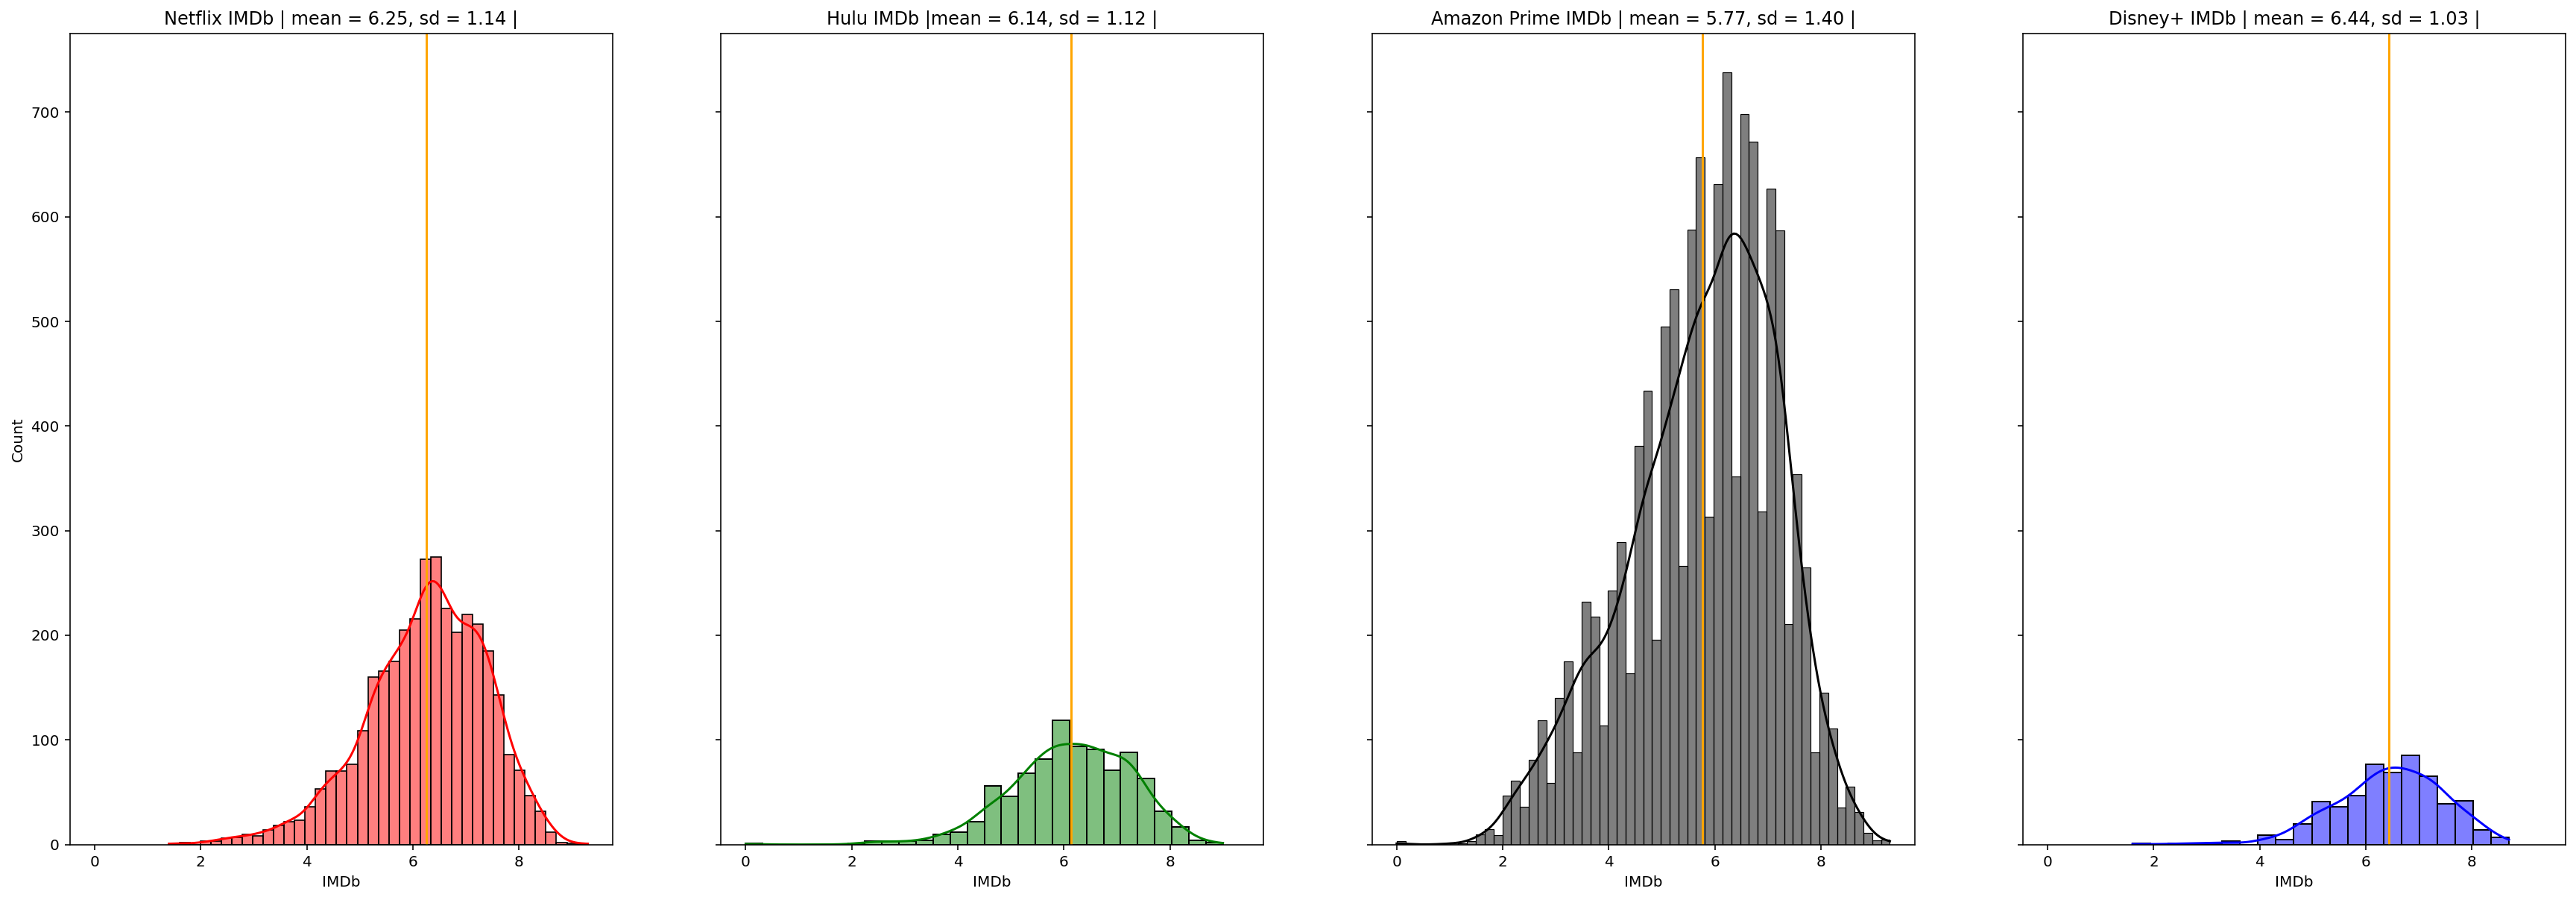

In [ ]:
fig, ax = plt.subplots(1,4, sharey=True,sharex=True)
fig.set_figheight(10)
fig.set_figwidth(30)
print(ax.shape)
sns.histplot(netflix_movies['IMDb'], kde=True, ax=ax[0], color="red")
ax[0].axvline(x=netflix_movies['IMDb'].mean() , color="orange")
ax[0].title.set_text(f"Netflix IMDb | mean = {netflix_movies['IMDb'].mean():.2f}, sd = {netflix_movies['IMDb'].std():.2f} |")

sns.histplot(hulu_movies['IMDb'], kde=True, ax=ax[1], color="green")
ax[1].axvline(x=hulu_movies['IMDb'].mean() , color="orange")
ax[1].title.set_text(f"Hulu IMDb |mean = {hulu_movies['IMDb'].mean():.2f}, sd = {hulu_movies['IMDb'].std():.2f} |")

sns.histplot(primeVideo_movies['IMDb'], kde=True, ax=ax[2], color="black")
ax[2].axvline(x=primeVideo_movies['IMDb'].mean() , color="orange")
ax[2].title.set_text(f"Amazon Prime IMDb | mean = {primeVideo_movies['IMDb'].mean():.2f}, sd = {primeVideo_movies['IMDb'].std():.2f} |")

sns.histplot(disneyPlus_movies['IMDb'], kde=True, ax=ax[3], color="blue")
ax[3].axvline(x=disneyPlus_movies['IMDb'].mean() , color="orange")
ax[3].title.set_text(f"Disney+ IMDb | mean = {disneyPlus_movies['IMDb'].mean():.2f}, sd = {disneyPlus_movies['IMDb'].std():.2f} |")

เช็คค่าใน column "Age" ว่ามีค่าเป็นอะไรบ้าง

In [ ]:
dataframe_2['Age'].unique()

array(['13+', '18+', '7+', nan, 'all', '16+'], dtype=object)

แสดงเรทอายุของหนังใน platform ต่างๆ โดยใช้ Seaborn มีการ share แกน Y แต่ไม่แชร์แกน X เพราะอยากให้มองเห็นถึงจำนวนหนังในเรทต่างๆ โดยไม่เทียบจำนวนว่าใน Platform ไหนมีหนังเยอะกว่ากัน

ใช้ countplot ในการ plot กราฟ เพราะต้องการให้มันนับจำนวนของอายุในแต่ละช่วง และนำมาแสดงเป็นกราฟ

(4,)


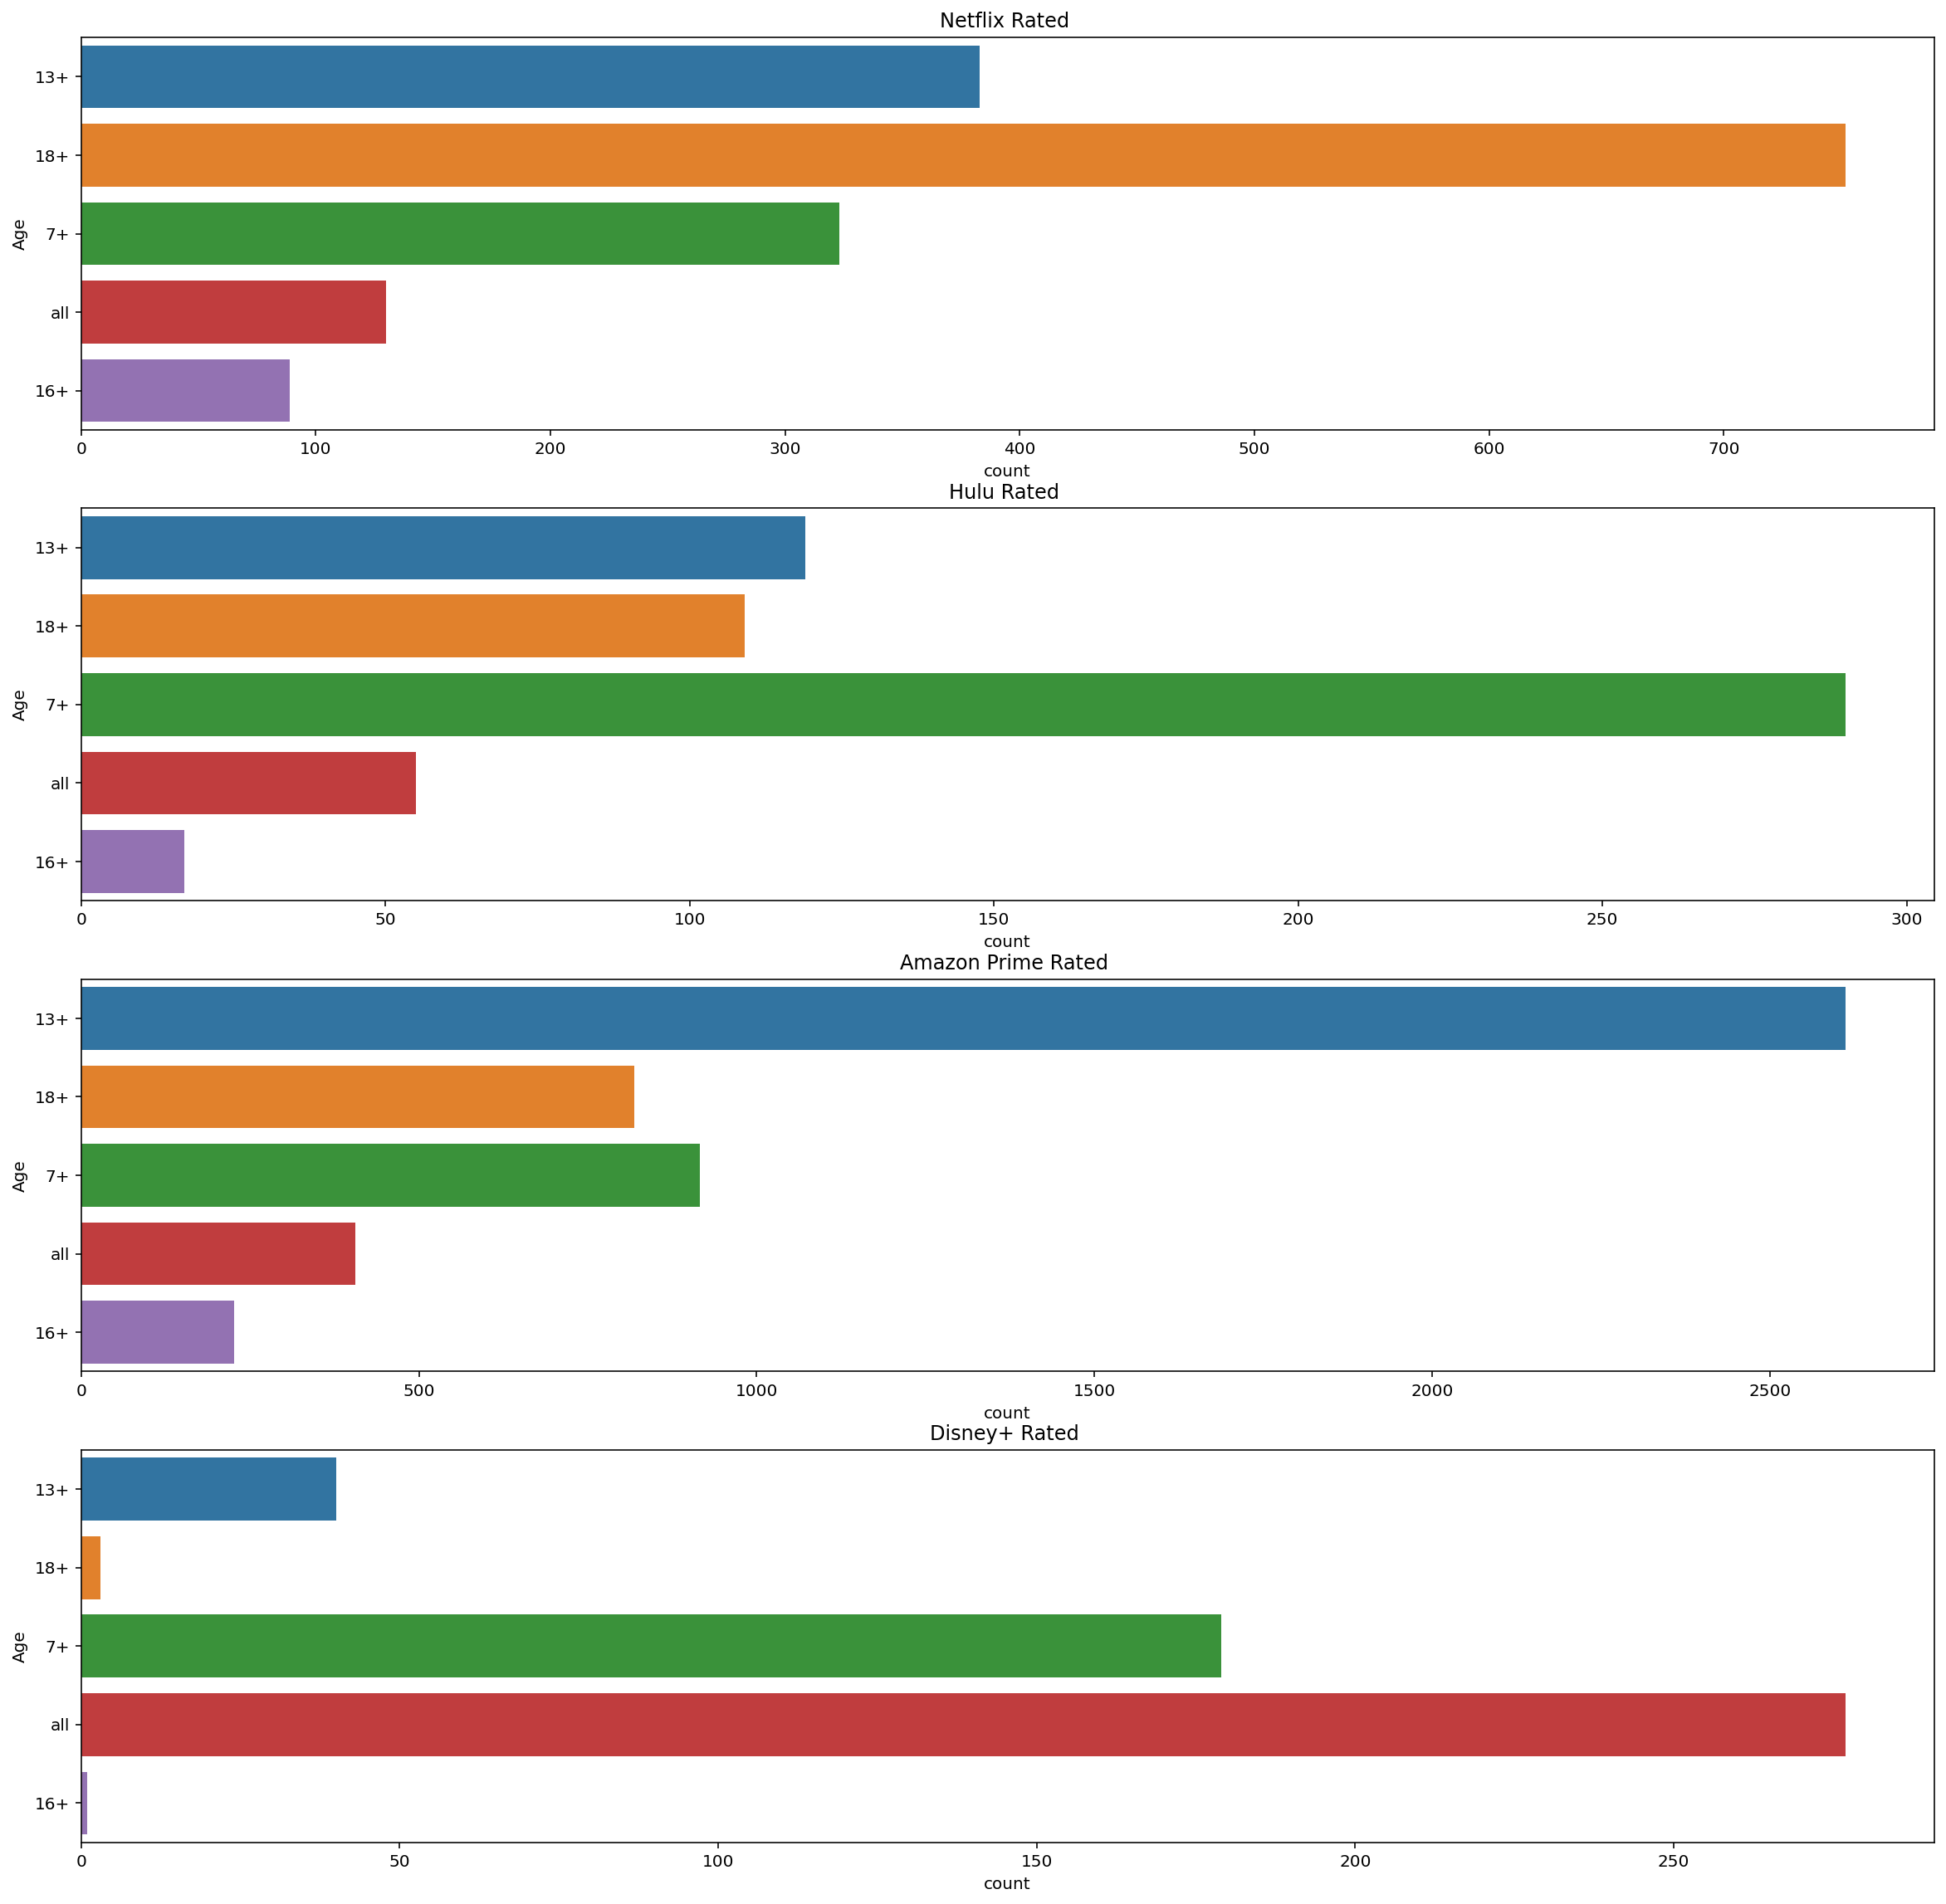

In [37]:
fig, ax = plt.subplots(4,1, sharey=True,sharex=False)
fig.set_figheight(20)
fig.set_figwidth(20)
print(ax.shape)

sns.countplot(y="Age", data=netflix_movies,ax=ax[0])
ax[0].title.set_text("Netflix Rated ")
sns.countplot(y="Age", data=hulu_movies,ax=ax[1])
ax[1].title.set_text("Hulu Rated ")
sns.countplot(y="Age", data=primeVideo_movies,ax=ax[2])
ax[2].title.set_text("Amazon Prime Rated ")
sns.countplot(y="Age", data=disneyPlus_movies,ax=ax[3])
ax[3].title.set_text("Disney+ Rated ")

แบ่งออกมาเป็นแต่ละ Platform โดยแสดงเป็น Pie Charts มีเปอเซนต์กำกับ

In [38]:
index1 = netflix_movies.loc[netflix_movies['Age'] == '13+'].index
netflix_movies_13plus = len(index1)

index2 = netflix_movies.loc[netflix_movies['Age'] == '18+'].index
netflix_movies_18plus = len(index2)

index3 = netflix_movies.loc[netflix_movies['Age'] == '7+'].index
netflix_movies_7plus = len(index3)

index4 = netflix_movies.loc[netflix_movies['Age'] == 'all'].index
netflix_movies_all = len(index4)

index5 = netflix_movies.loc[netflix_movies['Age'] == '16+'].index
netflix_movies_16plus = len(index5)



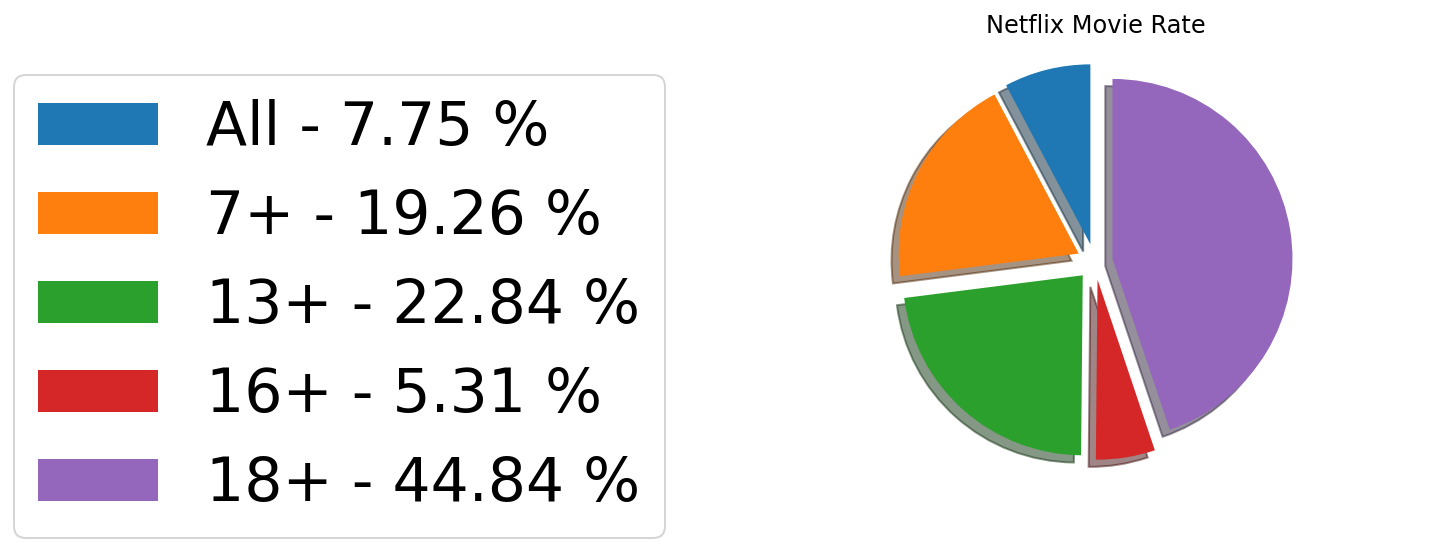

In [39]:
labels = 'All' , '7+', '13+', '16+', '18+'
total_movies = [netflix_movies_all,netflix_movies_7plus,netflix_movies_13plus,netflix_movies_16plus,netflix_movies_18plus]
explode = (0.1, 0.1, 0.1, 0.1, 0.1 )
data_array = np.array(total_movies)
percent = 100.* (data_array/data_array.sum())

mylabels = ['{0} - {1:1.2f} %'.format(i,j) for i,j in zip(labels, percent)]
fig1 , ax1 = plt.subplots()

ax1.pie(total_movies, explode = explode, shadow = True, startangle = 90)

ax1.legend(mylabels, bbox_to_anchor=(-0.1, 1.), fontsize=30)
ax1.set_title('Netflix Movie Rate')
# _ = ax.axis ('equal')
ax1.axis ('equal')
plt.show()

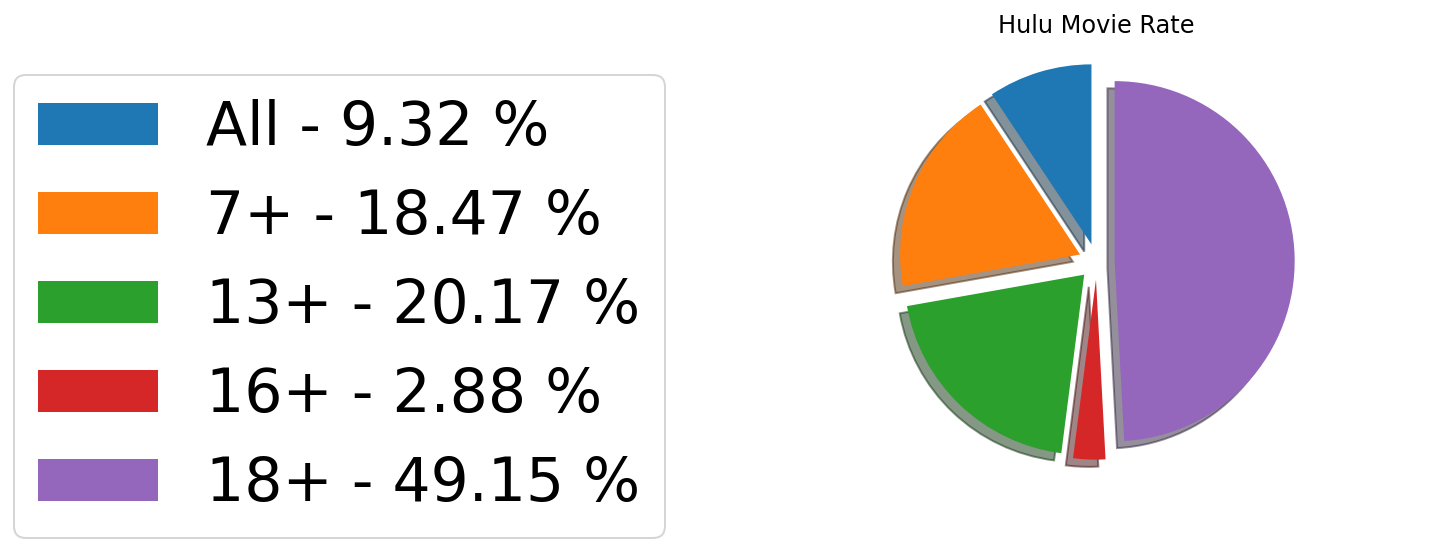

In [40]:
index1 = hulu_movies.loc[hulu_movies['Age'] == '13+'].index
hulu_movies_13plus = len(index1)

index2 = hulu_movies.loc[hulu_movies['Age'] == '18+'].index
hulu_movies_18plus = len(index2)

index3 = hulu_movies.loc[hulu_movies['Age'] == '7+'].index
hulu_movies_7plus = len(index3)

index4 = hulu_movies.loc[hulu_movies['Age'] == 'all'].index
hulu_movies_all = len(index4)

index5 = hulu_movies.loc[hulu_movies['Age'] == '16+'].index
hulu_movies_16plus = len(index5)

labels = 'All' , '7+', '13+', '16+', '18+'
total_movies = [hulu_movies_all,hulu_movies_7plus,hulu_movies_13plus,hulu_movies_16plus,hulu_movies_18plus]
explode = (0.1, 0.1, 0.1, 0.1, 0.1 )
data_array = np.array(total_movies)
percent = 100.* (data_array/data_array.sum())

mylabels = ['{0} - {1:1.2f} %'.format(i,j) for i,j in zip(labels, percent)]
fig1 , ax1 = plt.subplots()
ax1.set_title('Hulu Movie Rate')
ax1.pie(total_movies, explode = explode, shadow = True, startangle = 90)

ax1.legend(mylabels, bbox_to_anchor=(-0.1, 1.), fontsize=30)

# _ = ax.axis ('equal')
ax1.axis ('equal')
plt.show()

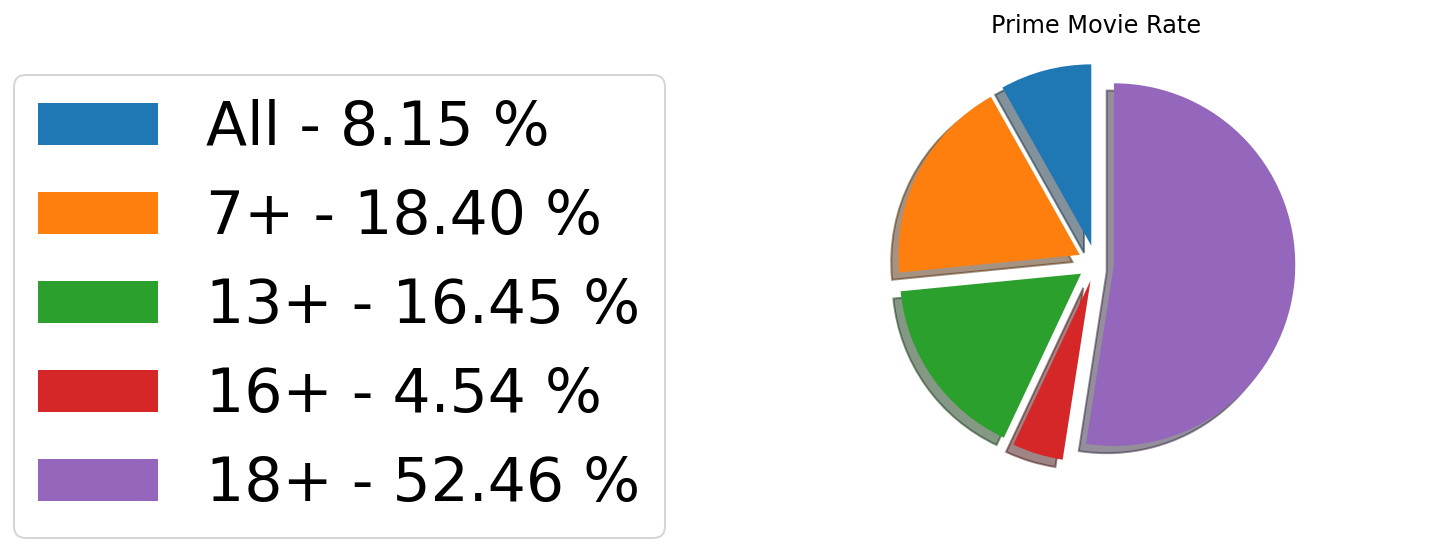

In [41]:
index1 = primeVideo_movies.loc[primeVideo_movies['Age'] == '13+'].index
primeVideo_13plus = len(index1)

index2 = primeVideo_movies.loc[primeVideo_movies['Age'] == '18+'].index
primeVideo_18plus = len(index2)

index3 = primeVideo_movies.loc[primeVideo_movies['Age'] == '7+'].index
primeVideo_7plus = len(index3)

index4 = primeVideo_movies.loc[primeVideo_movies['Age'] == 'all'].index
primeVideo_all = len(index4)

index5 = primeVideo_movies.loc[primeVideo_movies['Age'] == '16+'].index
primeVideo_16plus = len(index5)

labels = 'All' , '7+', '13+', '16+', '18+'
total_movies = [primeVideo_all,primeVideo_7plus,primeVideo_13plus,primeVideo_16plus,primeVideo_18plus]
explode = (0.1, 0.1, 0.1, 0.1, 0.1 )
data_array = np.array(total_movies)
percent = 100.* (data_array/data_array.sum())

mylabels = ['{0} - {1:1.2f} %'.format(i,j) for i,j in zip(labels, percent)]
fig1 , ax1 = plt.subplots()

ax1.pie(total_movies, explode = explode, shadow = True, startangle = 90)
ax1.set_title('Prime Movie Rate')
ax1.legend(mylabels, bbox_to_anchor=(-0.1, 1.), fontsize=30)

# _ = ax.axis ('equal')
ax1.axis ('equal')
plt.show()

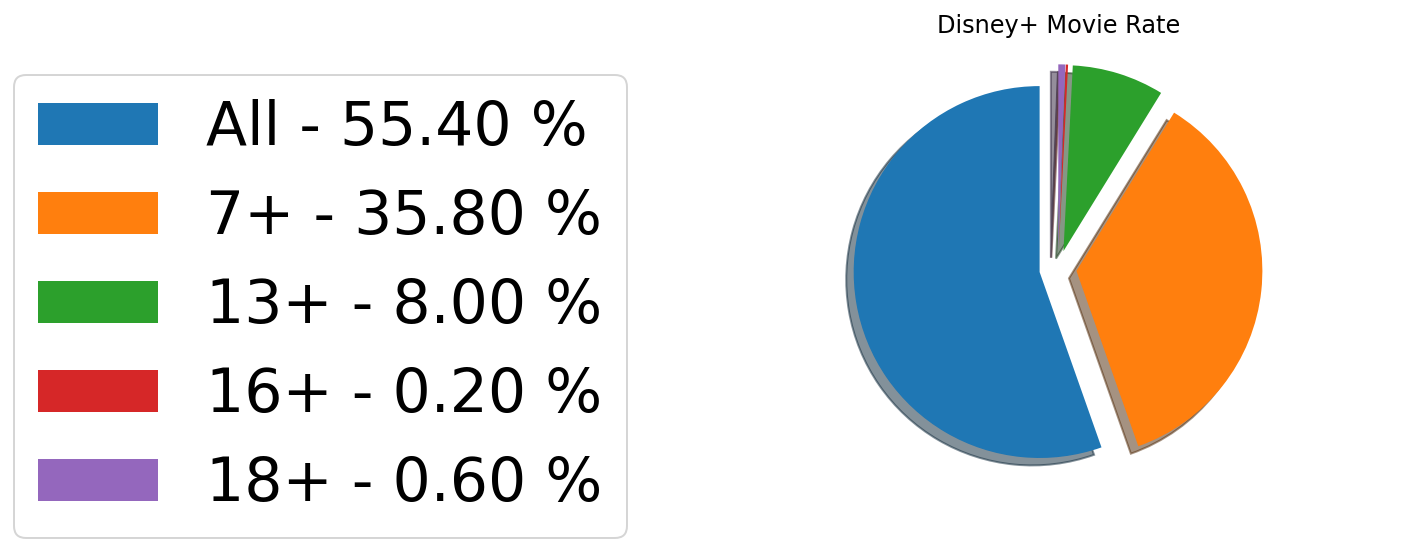

In [42]:
index1 = disneyPlus_movies.loc[disneyPlus_movies['Age'] == '13+'].index
disneyPlus_movies_13plus = len(index1)

index2 = disneyPlus_movies.loc[disneyPlus_movies['Age'] == '18+'].index
disneyPlus_movies_18plus = len(index2)

index3 = disneyPlus_movies.loc[disneyPlus_movies['Age'] == '7+'].index
disneyPlus_movies_7plus = len(index3)

index4 = disneyPlus_movies.loc[disneyPlus_movies['Age'] == 'all'].index
disneyPlus_movies_all = len(index4)

index5 = disneyPlus_movies.loc[disneyPlus_movies['Age'] == '16+'].index
disneyPlus_movies_16plus = len(index5)

labels = 'All' , '7+', '13+', '16+', '18+'
total_movies = [disneyPlus_movies_all,disneyPlus_movies_7plus,disneyPlus_movies_13plus,disneyPlus_movies_16plus,disneyPlus_movies_18plus]
explode = (0.1, 0.1, 0.1, 0.1, 0.1 )
data_array = np.array(total_movies)
percent = 100.* (data_array/data_array.sum())

mylabels = ['{0} - {1:1.2f} %'.format(i,j) for i,j in zip(labels, percent)]
fig1 , ax1 = plt.subplots()
ax1.set_title('Disney+ Movie Rate')
ax1.pie(total_movies, explode = explode, shadow = True, startangle = 90)

ax1.legend(mylabels, bbox_to_anchor=(-0.1, 1.), fontsize=30)

# _ = ax.axis ('equal')
ax1.axis ('equal')
plt.show()

In [45]:
list_of_language = dataframe_2['Language'].str.split(',',expand = True)
list_of_language

,0,1,2,3,4,5,6,7,8,9
0,English,Japanese,French,None,None,None,None,None,None,None
1,English,None,None,None,None,None,None,None,None,None
2,English,None,None,None,None,None,None,None,None,None
3,English,None,None,None,None,None,None,None,None,None
4,Italian,None,None,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...
16739,English,None,None,None,None,None,None,None,None,None
16740,English,None,None,None,None,None,None,None,None,None
16741,English,None,None,None,None,None,None,None,None,None
16742,English,None,None,None,None,None,None,None,None,None


In [46]:
language = []
for i in range(0,9):
    list_of_language[i]
    for j in range(0, 16744) :
        if (list_of_language[i][j] not in language) and list_of_language[i][j] != 'None' and list_of_language[i][j] != 'nan' :
            language.append(list_of_language[i][j])
        else:
            pass  
language

['English',
 'Italian',
 'Hindi',
 'Spanish',
 'Korean',
 'Cantonese',
 'Japanese',
 'French',
 'Telugu',
 'Thai',
 'East-Greenlandic',
 'Swedish',
 'Filipino',
 'Arabic',
 'Ukrainian',
 'Hungarian',
 'Marathi',
 'Persian',
 'Norwegian',
 'Indonesian',
 'Romanian',
 'Portuguese',
 'Vietnamese',
 'Khmer',
 'Mandarin',
 nan,
 'Georgian',
 'Russian',
 'Urdu',
 'Basque',
 'Tamil',
 'Danish',
 'Turkish',
 'Akan',
 'German',
 'Yiddish',
 'Wolof',
 'Hebrew',
 'Flemish',
 'Slovenian',
 'Dutch',
 'Punjabi',
 'Icelandic',
 'American Sign Language',
 'Malayalam',
 'Bengali',
 'Tagalog',
 'Polish',
 'Kannada',
 'Finnish',
 'Gujarati',
 'Malay',
 'Croatian',
 'Nepali',
 'Chinese',
 'Catalan',
 'Zulu',
 'Yoruba',
 'Afrikaans',
 'Sanskrit',
 'Sinhalese',
 'Assamese',
 'Kurdish',
 'Maya',
 'Estonian',
 'Czech',
 'Swiss German',
 'Aboriginal',
 'Serbian',
 'Bulgarian',
 'Xhosa',
 'Sicilian',
 'Lingala',
 'Haitian',
 'Greek',
 'Kinyarwanda',
 'Min Nan',
 'Mongolian',
 'Aramaic',
 'Kirghiz',
 'Bosnian',


แสดง pie charts สถิติปีที่สร้างหนังในแต่ละ platform ในช่วง ก่อนปี ค.ศ 2000 และ ตั้งแต่ปี ค.ศ. 2000 ขึ้นไป

สำหรับคนที่ต้องการพิจารณาอยากดูหนังเก่า หรือ หนังใหม่

โค๊ดด้านล่างทำหน้าที่แบ่งหนังตามช่วงปี และนับจำนวน index เพื่อจะนำไปใช้ plot pie charts ใน โค๊ดส่วนต่อไป

In [72]:
netflix_under2000 = netflix_movies.loc[netflix_movies['Year'] < 2000]
netflix_upper2000 = netflix_movies.loc[netflix_movies['Year'] >= 2000]
index_netflix = netflix_under2000.index
total_netflix_movies_under2000 = len(index_netflix)
index_netflix = netflix_upper2000.index
total_netflix_movies_upper2000 = len(index_netflix)

hulu_under2000 = hulu_movies.loc[hulu_movies['Year'] < 2000]
hulu_upper2000 = hulu_movies.loc[hulu_movies['Year'] >= 2000]
index_hulu = hulu_under2000.index
total_hulu_movies_under2000 = len(index_hulu)
index_hulu = hulu_upper2000.index
total_hulu_movies_upper2000 = len(index_hulu)

primeVideo_under2000 = primeVideo_movies.loc[primeVideo_movies['Year'] < 2000]
primeVideo_upper2000 = primeVideo_movies.loc[primeVideo_movies['Year'] >= 2000]
index_primeVideo = primeVideo_under2000.index
total_primeVideo_movies_under2000 = len(index_primeVideo)
index_primeVideo = primeVideo_upper2000.index
total_primeVideo_movies_upper2000 = len(index_primeVideo)

disneyPlus_under2000 = disneyPlus_movies.loc[disneyPlus_movies['Year'] < 2000]
disneyPlus_upper2000 = disneyPlus_movies.loc[disneyPlus_movies['Year'] >= 2000]
index_disneyPlus = disneyPlus_under2000.index
total_disneyPlus_movies_under2000 = len(index_disneyPlus)
index_disneyPlus = disneyPlus_upper2000.index
total_disneyPlus_movies_upper2000 = len(index_disneyPlus)

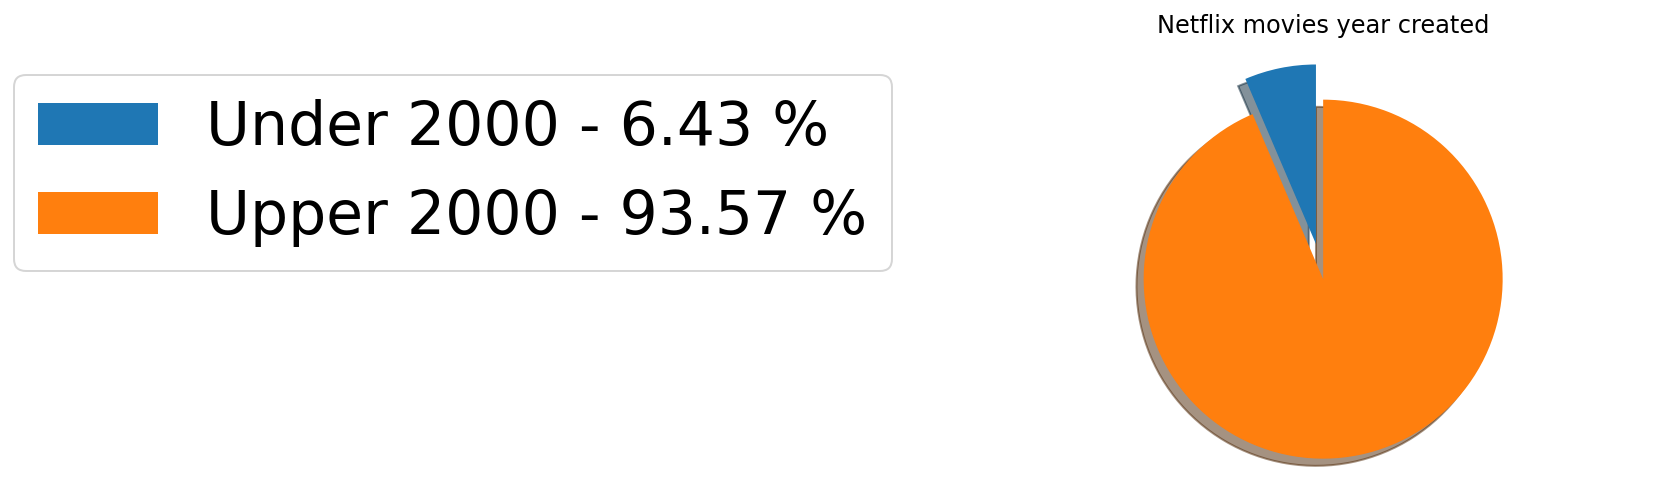

In [71]:
labels ='Under 2000','Upper 2000'
total_movies = [total_netflix_movies_under2000,total_netflix_movies_upper2000]
explode = (0.1, 0.1)
data_array = np.array(total_movies)
percent = 100.* (data_array/data_array.sum())

mylabels = ['{0} - {1:1.2f} %'.format(i,j) for i,j in zip(labels, percent)]
fig1 , ax1 = plt.subplots()

ax1.pie(total_movies, explode = explode, shadow = True, startangle = 90)
ax1.set_title('Netflix movies year created')
ax1.legend(mylabels, bbox_to_anchor=(-0.1, 1.), fontsize=30)

# _ = ax.axis ('equal')
ax1.axis ('equal')
plt.show()

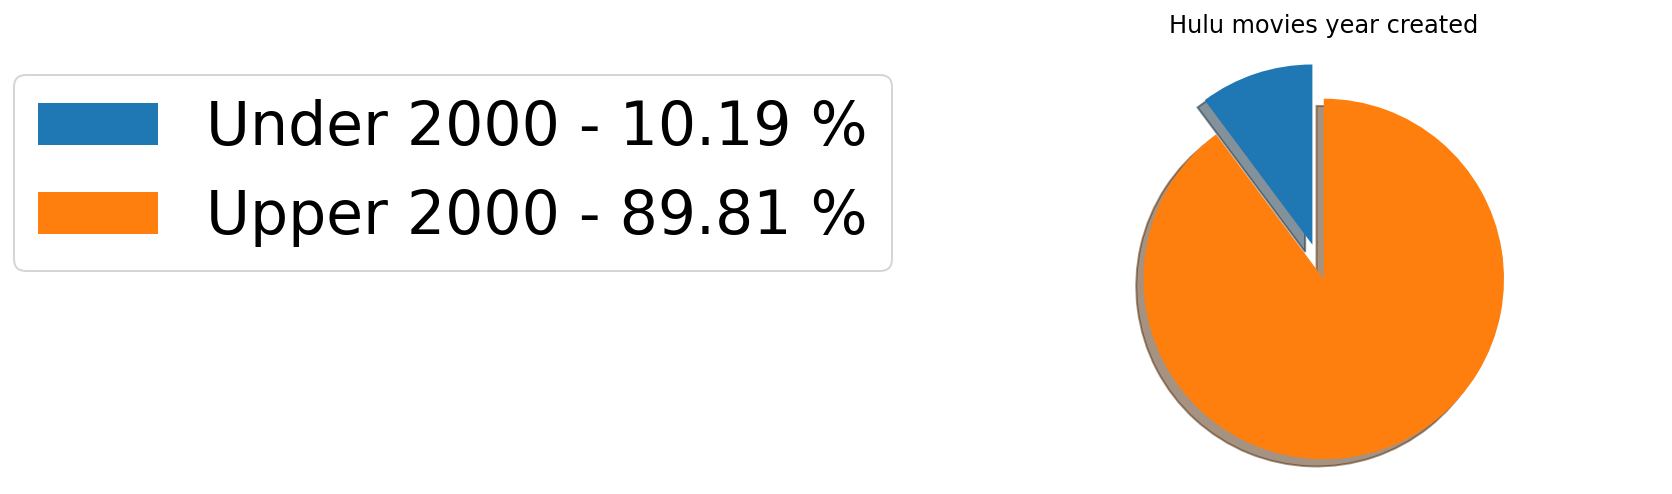

In [74]:
labels ='Under 2000','Upper 2000'
total_movies = [total_hulu_movies_under2000,total_hulu_movies_upper2000]
explode = (0.1, 0.1)
data_array = np.array(total_movies)
percent = 100.* (data_array/data_array.sum())

mylabels = ['{0} - {1:1.2f} %'.format(i,j) for i,j in zip(labels, percent)]
fig1 , ax1 = plt.subplots()

ax1.pie(total_movies, explode = explode, shadow = True, startangle = 90)
ax1.set_title('Hulu movies year created')
ax1.legend(mylabels, bbox_to_anchor=(-0.1, 1.), fontsize=30)

# _ = ax.axis ('equal')
ax1.axis ('equal')
plt.show()

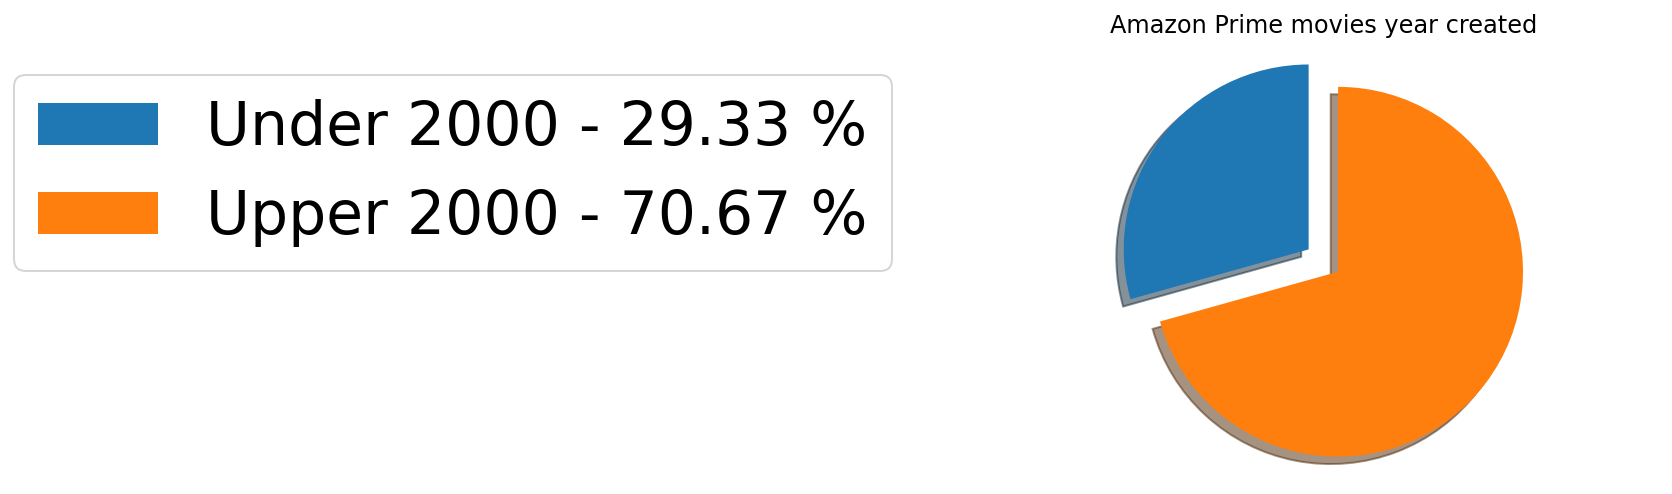

In [75]:
labels ='Under 2000','Upper 2000'
total_movies = [total_primeVideo_movies_under2000,total_primeVideo_movies_upper2000]
explode = (0.1, 0.1)
data_array = np.array(total_movies)
percent = 100.* (data_array/data_array.sum())

mylabels = ['{0} - {1:1.2f} %'.format(i,j) for i,j in zip(labels, percent)]
fig1 , ax1 = plt.subplots()

ax1.pie(total_movies, explode = explode, shadow = True, startangle = 90)
ax1.set_title('Amazon Prime movies year created')
ax1.legend(mylabels, bbox_to_anchor=(-0.1, 1.), fontsize=30)

# _ = ax.axis ('equal')
ax1.axis ('equal')
plt.show()

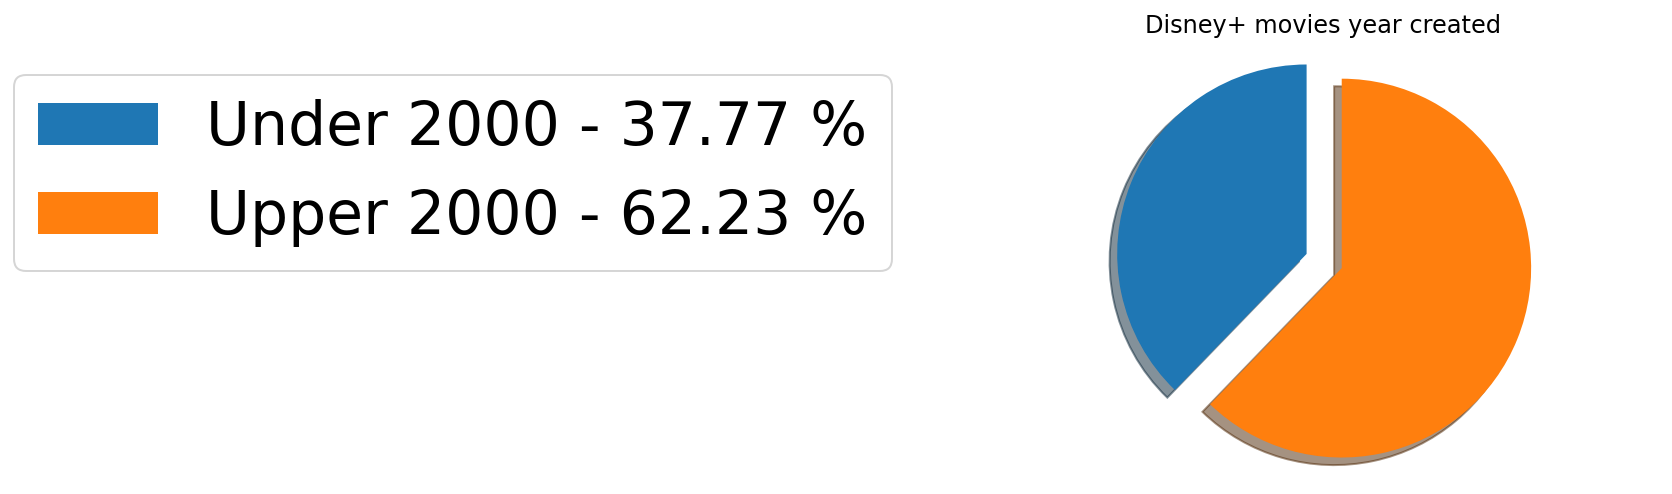

In [76]:
labels ='Under 2000','Upper 2000'
total_movies = [total_disneyPlus_movies_under2000,total_disneyPlus_movies_upper2000]
explode = (0.1, 0.1)
data_array = np.array(total_movies)
percent = 100.* (data_array/data_array.sum())

mylabels = ['{0} - {1:1.2f} %'.format(i,j) for i,j in zip(labels, percent)]
fig1 , ax1 = plt.subplots()

ax1.pie(total_movies, explode = explode, shadow = True, startangle = 90)
ax1.set_title('Disney+ movies year created')
ax1.legend(mylabels, bbox_to_anchor=(-0.1, 1.), fontsize=30)

# _ = ax.axis ('equal')
ax1.axis ('equal')
plt.show()